# Iris Species:

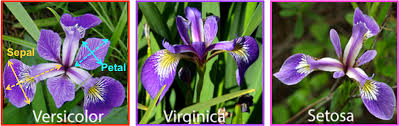

# Problem Statement:

The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.

# Objective:

Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks.

# Importing the Libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset:

In [3]:
irs=pd.read_csv(r'C:\Users\mark4\Desktop\Jupyter Notebook\Job Assignment\Codesoft\Task 5_ Iris Flower Prediction\IRIS.csv')
irs

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
irs.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

## basic info:

In [5]:
irs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


* no null values present in the data

## EDA and Preprocessing:

In [24]:
irs.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [6]:
irs1=irs

In [7]:
irs1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Distribution of sepal_length, sepal_width, petal_length,	petal_width:

In [18]:
for i in irs1.iloc[:,0:4]:
    print(i)

sepal_length
sepal_width
petal_length
petal_width


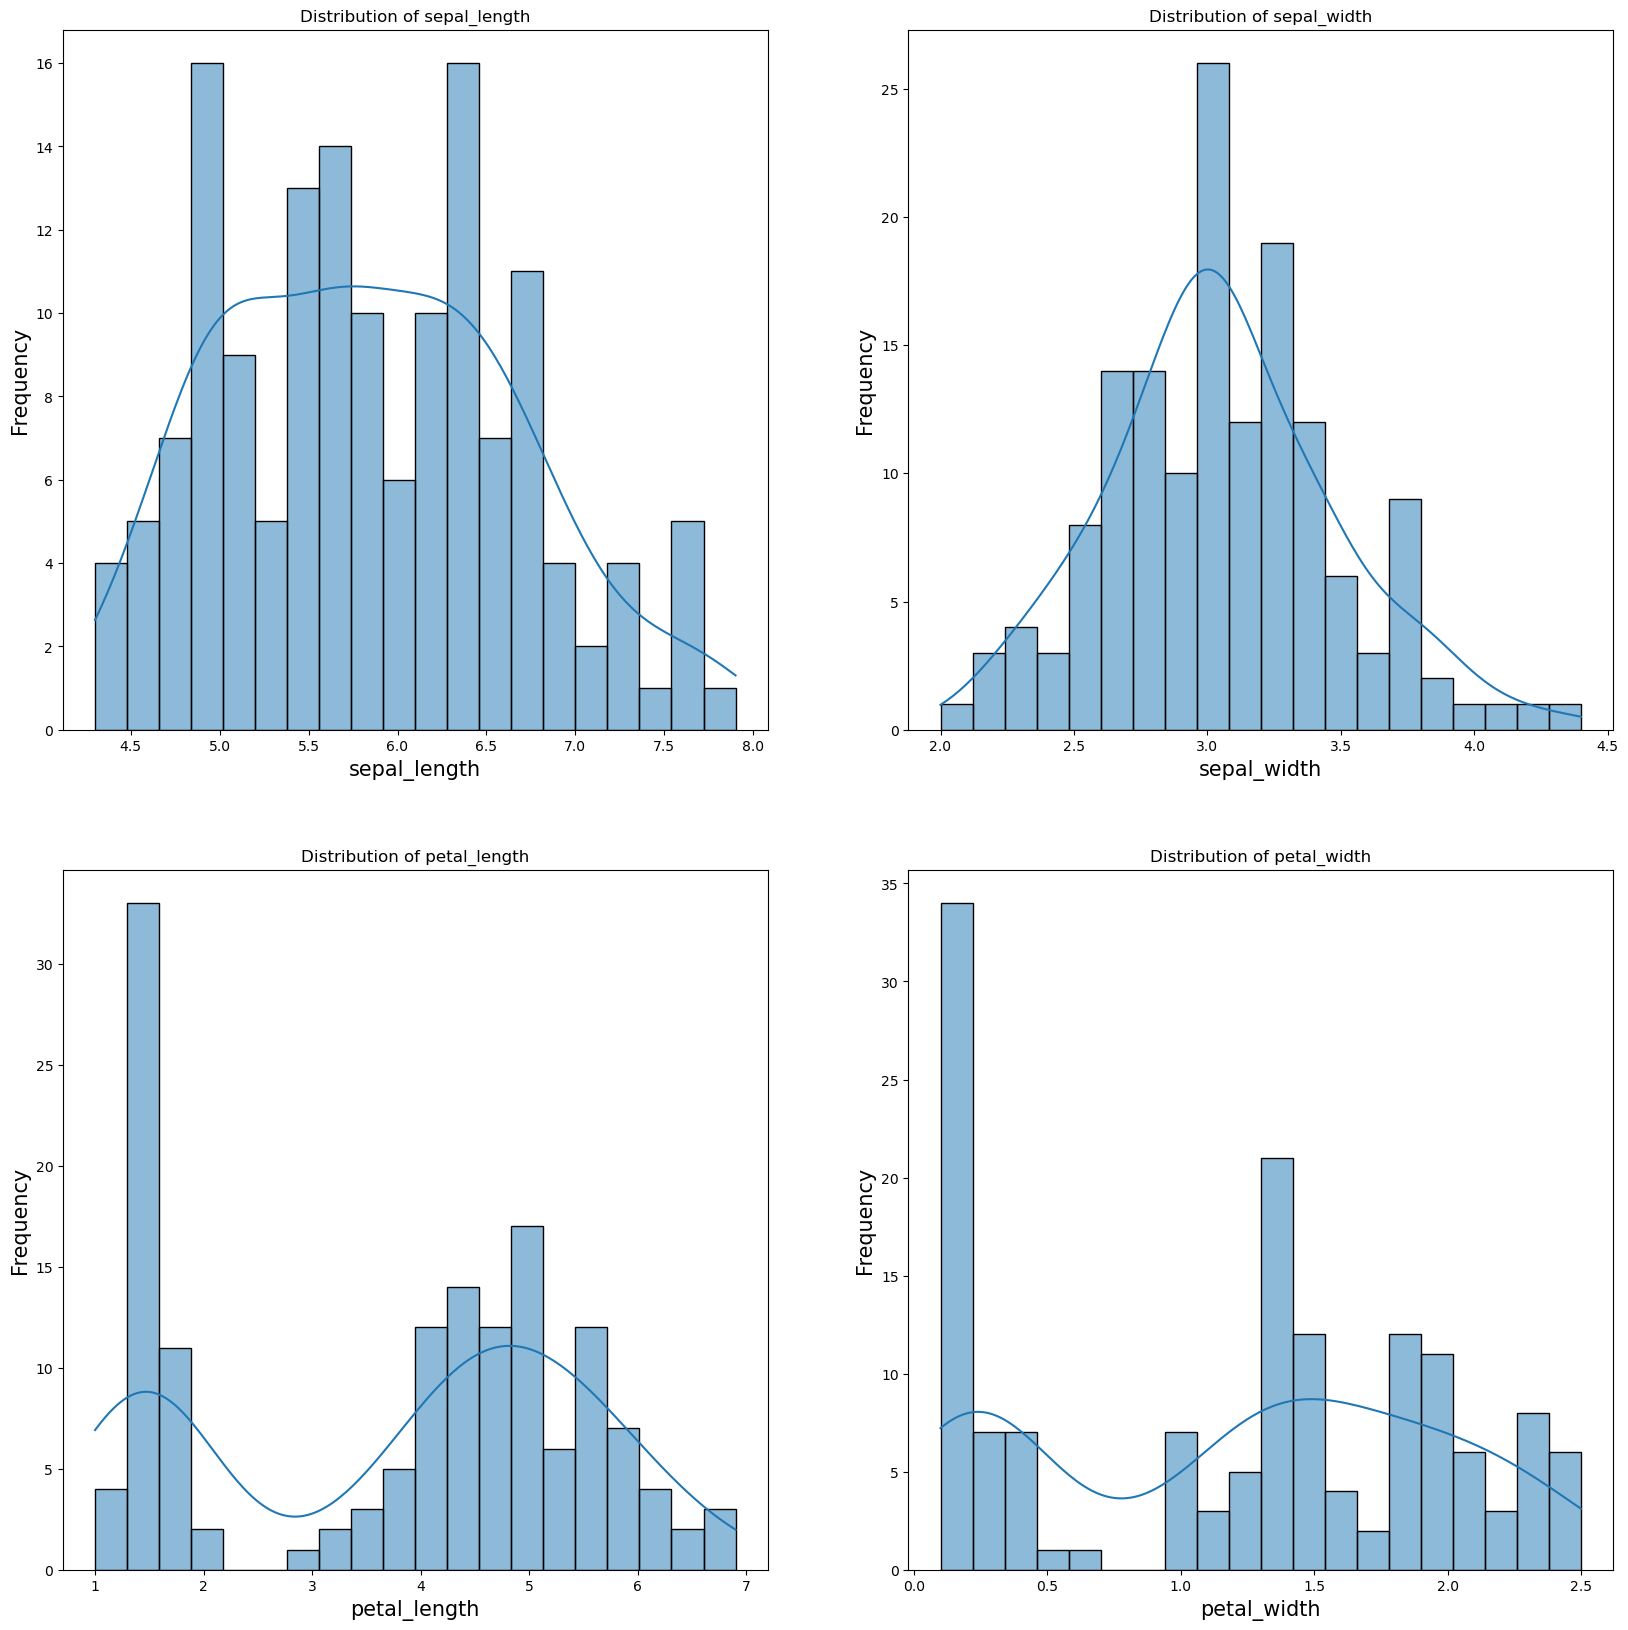

In [19]:
plt.figure(figsize =(20,20))
plotnumber=1

for i in irs1.iloc[:,0:4]:
    plt.subplot(2,2,plotnumber)
    ax=sns.histplot(data=irs1,x=i,bins=20,kde=True)
    plt.xlabel(i,fontsize = 15)
    plt.ylabel('Frequency',fontsize = 15)
    plt.title('Distribution of '+i)
    plotnumber+=1 
plt.show()

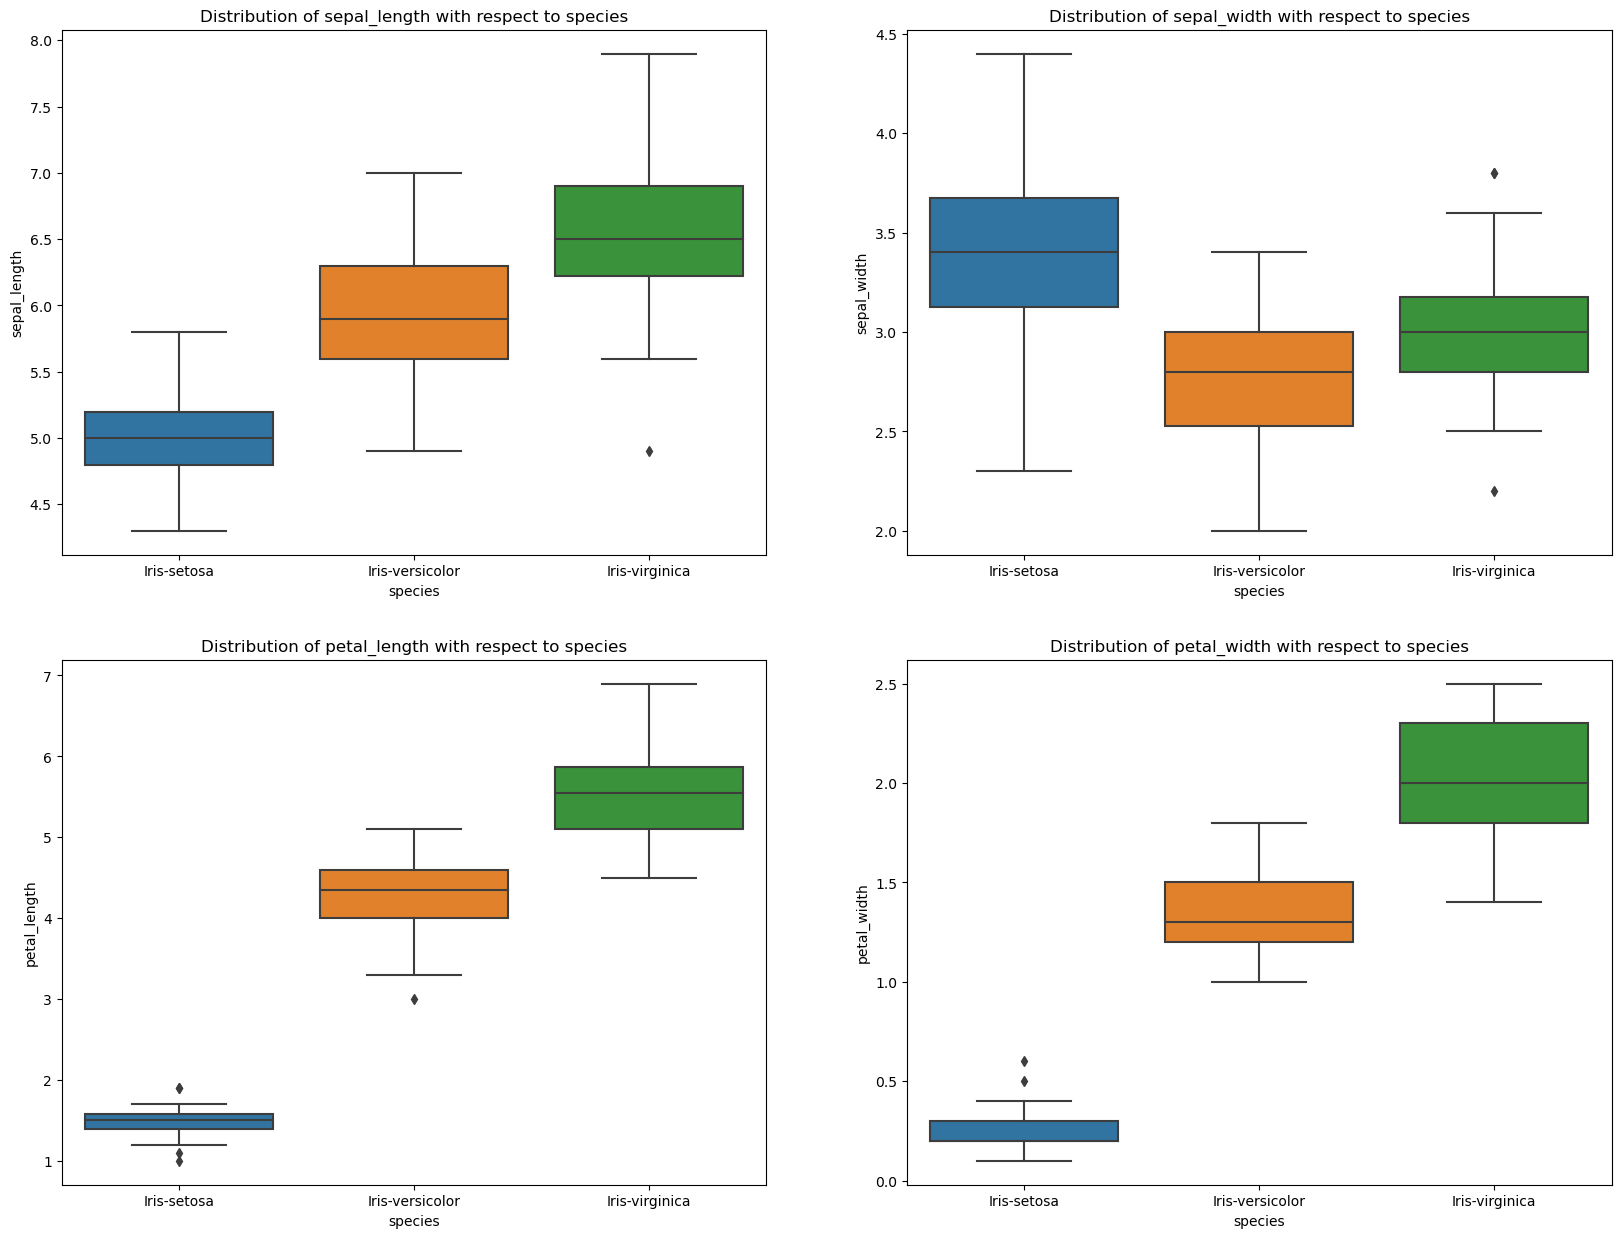

In [27]:
plt.figure(figsize =(20,15))
plotnumber=1

for i in irs1.iloc[:,0:4]:
    plt.subplot(2,2,plotnumber)
    sns.boxplot(x=irs1.species,y=irs1[i])
    plt.title('Distribution of '+i+' with respect to species')
    plotnumber+=1 
plt.show()

## Checking for outliers:

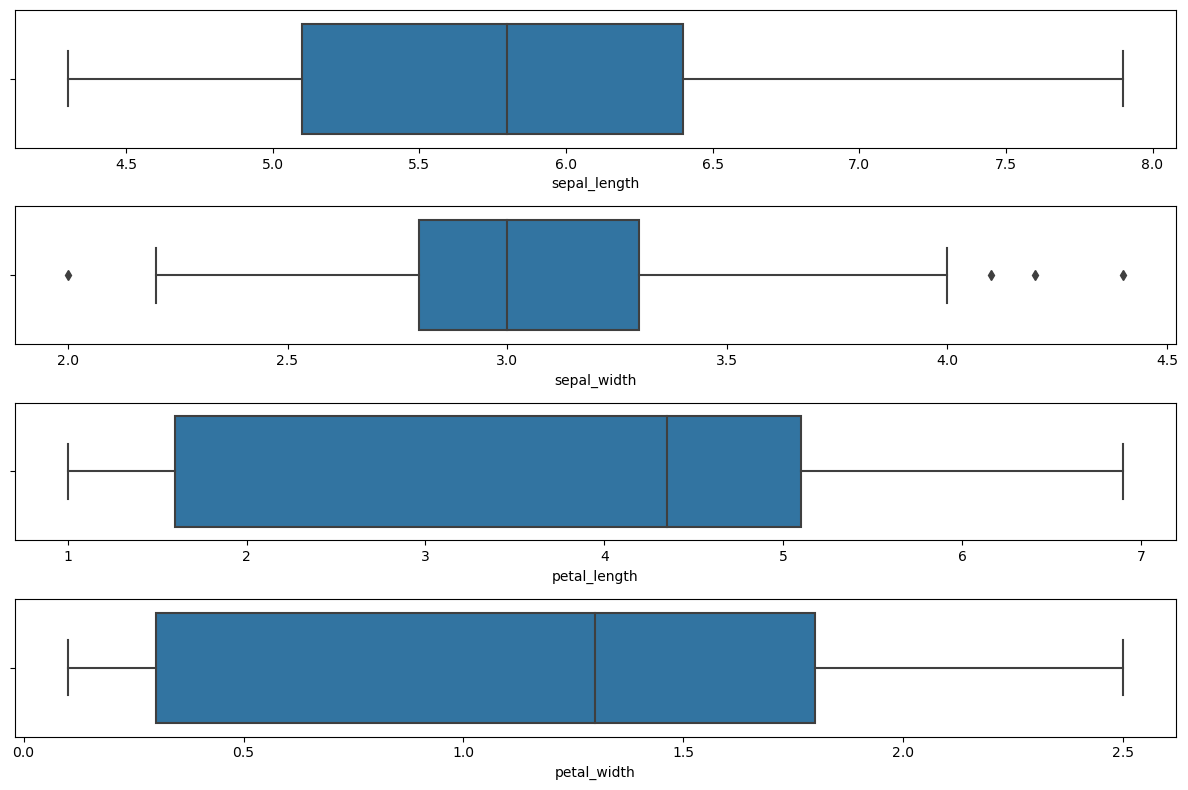

In [44]:
plt.figure(figsize =(12,8))
plotnumber=1

for i in irs1.iloc[:,0:4]:
    plt.subplot(4,1,plotnumber)
    sns.boxplot(x=irs1[i])
    plotnumber+=1 
    
plt.tight_layout()
plt.show()

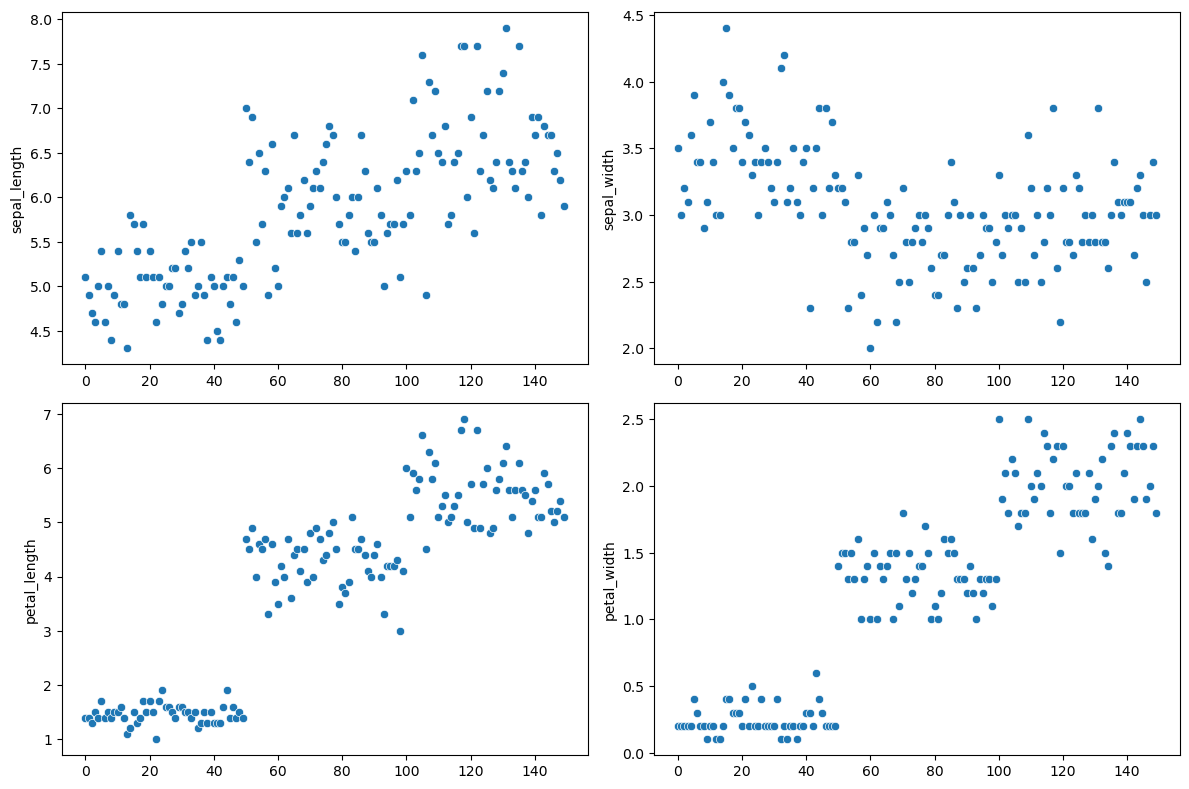

In [46]:
plt.figure(figsize =(12,8))
plotnumber=1

for i in irs1.iloc[:,0:4]:
    plt.subplot(2,2,plotnumber)
    sns.scatterplot(y=irs1[i],x=irs1[i].index)
    plotnumber+=1 
    
plt.tight_layout()
plt.show()

## Correlation:

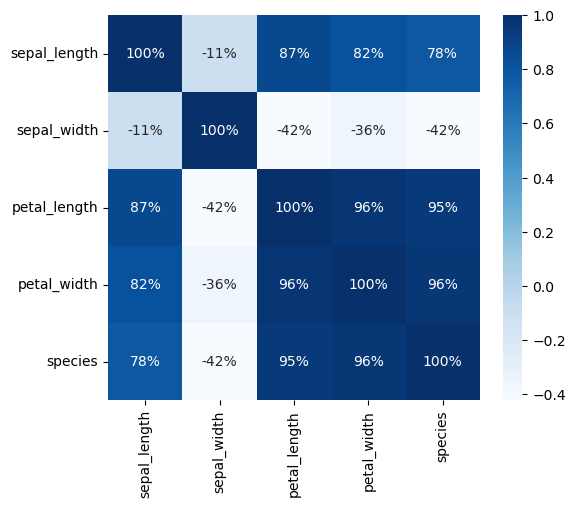

In [93]:
plt.figure(figsize=(6,5))
sns.heatmap(irs.corr(),annot=True,cmap="Blues",fmt='.0%')
plt.show()

In [ ]:
# We can observe the following from Correlation:

# petal_width vs petal_length- 96%
# petal_width vs sepal length- 82%
# petal_length vs sepal length- 87%

## Model Building:

* Before proceeding to build the model, first we have to encode the species

In [74]:
irs1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
# separating iris from the species:

irs1['species']=irs1['species'].str.replace('Iris-','')

In [76]:
irs1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Importing ML Liraries:

In [77]:
import warnings
warnings.filterwarnings('ignore') # Supressing Warnings

from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report

In [78]:
irs1['species']=LabelEncoder().fit_transform(irs1['species'])
irs1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Train-Test Split:

In [80]:
features=irs1.drop(['species'],axis=1)
target=irs1.species

In [81]:
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [83]:
target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [84]:
## Let's Split the data into train and test:

from sklearn.model_selection import train_test_split
train_features,test_features,train_target,test_target=train_test_split(features,target,train_size=0.7,random_state=32)

In [85]:
train_target.unique()

array([2, 1, 0])

In [86]:
test_target.unique()

array([1, 0, 2])

In [87]:
train_features.shape,test_features.shape

((105, 4), (45, 4))

In [88]:
train_target.shape,test_target.shape

((105,), (45,))

In [ ]:
# Models to be used:

# Logistic Regression
# SVC
# DecisionTree Classifier
# RandomForest Classifier
# GaussianNB Classifier

In [ ]:
# We will use loop to predict species for all the models at one execution

In [91]:
models = [LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),GaussianNB()]
 
for i in range(5):
    models[i].fit(train_features,train_target)
 
    print(f'{models[i]} : ')
    print()
    print('Training Accuracy : ', metrics.accuracy_score(train_target,models[i].predict(train_features))*100)
    print('Testing Accuracy : ', metrics.accuracy_score(test_target,models[i].predict(test_features))*100)
    print('\nConfusion Matrix:\n')
    print(confusion_matrix(test_target,models[i].predict(test_features)))
    print('\nClassification Report:\n')
    print(classification_report(test_target,models[i].predict(test_features)))
    print('----------'*10)

LogisticRegression() : 

Training Accuracy :  95.23809523809523
Testing Accuracy :  100.0

Confusion Matrix:

[[19  0  0]
 [ 0 12  0]
 [ 0  0 14]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

----------------------------------------------------------------------------------------------------
SVC() : 

Training Accuracy :  94.28571428571428
Testing Accuracy :  97.77777777777777

Confusion Matrix:

[[19  0  0]
 [ 0 12  0]
 [ 0  1 13]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.92      1.00      0.96        12
           2  